In [57]:
import cv2 as cv
import matplotlib.pyplot as plt

In [58]:
# Loading the images path
img1_path = "Images/box.png"
img2_path = "Images/box_in_scene.png"

#img1_path = "Images/coca-cola.jpg"
#img2_path = "Images/coca-agarrada.jpg"

#img1_path = "Images/image-1.jpg"
#img2_path = "Images/image-2.jpg"


In [59]:
# Read the images in grayscale
img1 = cv.imread(img1_path, 0)
img2 = cv.imread(img2_path, 0)

In [60]:
# Initialize an object type ORB to extract features
orb = cv.ORB_create()

In [61]:
# Obtain the features and their descriptors to do matching
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Matching features

In [62]:
# Initialize an object type BFMatcher, and use crossCheck to improve the result
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)


In [63]:
# run the algorithm to match the descriptors
matches = bf.match(des1,des2)

In [64]:
# Order all the features extracted between each other (from best to wrost)
matches = sorted(matches, key=lambda x: x.distance)


In [65]:
# Draw the best 10 matches
img3 = cv.drawMatches(img1, kp1, img2, kp2, matches[:10], None)

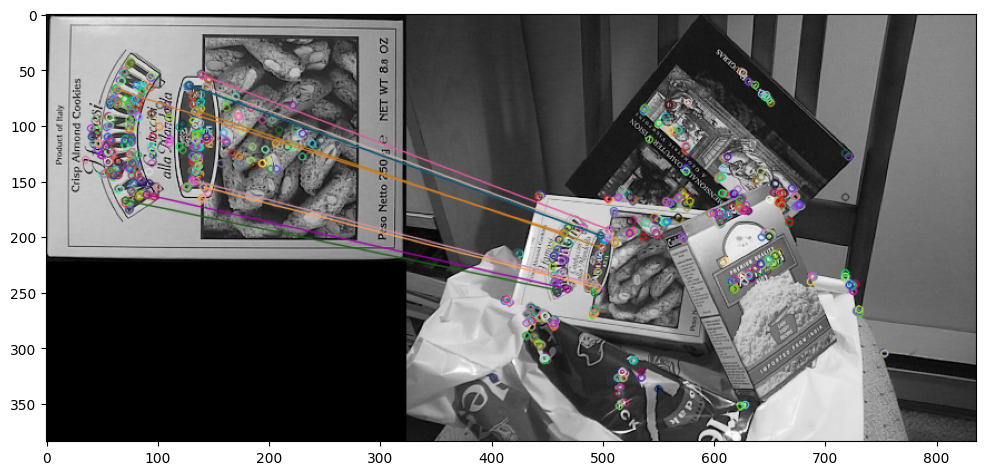

In [66]:
# To show the result on screen we'll increase the size by default of the plt 
# to see all the relevant data
plt.rcParams['figure.figsize'] = [12,6]

plt.imshow(img3)
plt.show()

# Finding Homography

In [67]:
import numpy as np

In [68]:
# We convert the founded features in white flat spots in order to estimate its 
# homography
src_pts = np.float32([kp1[m.queryIdx].pt for m in matches[:12]]).reshape(-1,1,2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches[:12]]).reshape(-1,1,2)

In [69]:
# Search the homography between two sets of points using the RANSAC method
M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)

In [70]:
# Convert the 3d mask into a list
matchesMask = mask.ravel().tolist()

In [71]:
# Obtaining the original size of the image, to know the size of the object 
# that are looking for
h, w = img1.shape

In [72]:
# We transform those sizes in the coordinates from the bbox which subsequently
# are going to find in the img2
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)

In [73]:
# Using the points returned from the homography we can convert as the perspective
# of the second image and divide it our book thanks to cv.perspectiveTransform
dst = cv.perspectiveTransform(pts, M)


In [74]:
# Draw the lines which unify the dots into a resultant coordinates from the 
# perspective aplying polylines
img2 = cv.polylines(img2, [np.int32(dst)], True, 255,3,cv.LINE_AA)



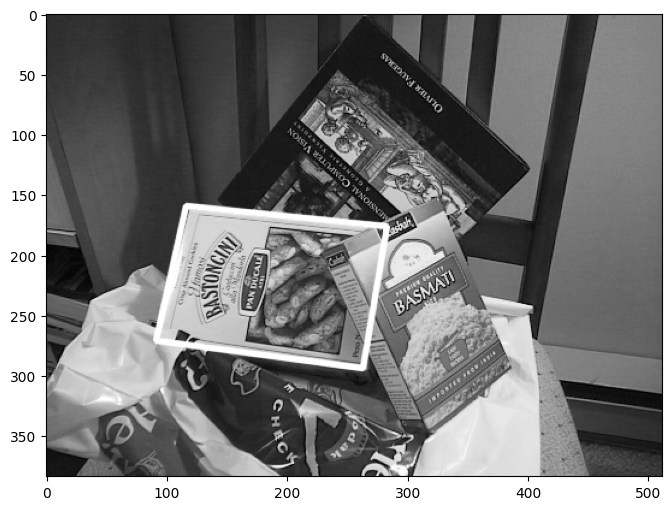

In [75]:
# show the resultant image
plt.imshow(img2, cmap='gray')
plt.show()